# BMIS-2542: Data Programming with Python 
##### Katz Graduate School of Business, Fall 2019

## Session-10: Regression Analysis
***

## Simple and Multiple Linear Regression

The simplest model we can think of is the **linear model**, where the response $\textbf{y}$ depends linearly from the covariates $\textbf{x}_i$.

In the **simple** linear regression, with a single variable, we described the relationship between the predictor and the response with a straight line. The model is:
$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 $$

The parameter $a_0$ is called the constant term or the *intercept*.
The parameter $a_1$ is called the *coefficient* term or slope of the regresison line.

In the case of *multiple* linear regression we extend this idea by fitting a m-dimensional hyperplane to our m predictors.

$$ \textbf{y}  =  a_1 \textbf{x}_1  + \dots + a_m \textbf{x}_{m} $$

The $a_i$ are termed the *parameters* of the model or the coefficients.

### Algorithm for Fitting: Ordinary Least Squares

Ordinary Least Squares (OLS) is the simplest and most common **estimator** in which the coefficients $a$'s 
of the simple linear regression: $\textbf{y} = a_0+a_1 \textbf{x}$, 
are chosen to minimize the **square of the distance between the predicted values and the actual values**. 

Given the set of samples $(\textbf{x},\textbf{y})$, the objective is to minimize:

$$ ||a_0 + a_1 \textbf{x} -  \textbf{y} ||^2 = \sum_{j=1}^n (a_0+a_1 x_{j} -  y_j )^2,$$ with respect to $a_0, a_1$.

This expression is often called **sum of squared errors of prediction (SSE)**.


## Polynomial Regression

Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors.

A very popular non-linear regression technique is *Polynomial Regression*, a technique which models the relationship between the response and the predictors as an n-th order polynomial. 

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

The higher the order of the polynomial the more "wigglier" functions (e.g., curves) you can fit. 

Using higher order polynomial comes at a price: **computational complexity** and **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.

### Example: Boston Housing Data
The Boston housing data set provides records measurements of 13 attributes of housing markets around Boston, as well as the median price. We want to predict the price of a market given a set of attributes. Let's load and visualize the data.

In [1]:
import warnings
warnings.simplefilter(action='ignore');

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import matplotlib.pylab as plt
%matplotlib inline 

plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (10,5))

Let's import the  Boston Housing dataset [from the sklearn library](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html). 

In [3]:
from sklearn import datasets

boston = datasets.load_boston()
X_boston,y_boston = boston.data, boston.target # These are numpy's ndarrays

# numpy.ndarray.shape returns the shape of the ndarray as a tuple.
# For a 1D array, the shape would be (n,) where n is the number of elements in your array.
# For a 2D array, the shape would be (n,m) where n is the number of rows and m is the number of columns in your array.
print ('Shape of data: X:', X_boston.shape, 'Y:', y_boston.shape)

Shape of data: X: (506, 13) Y: (506,)


In [4]:
print ('Keys:', boston.keys())
print ('Feature names:',boston.feature_names)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# We can convert this dataset object to a dataframe
dfBoston = pd.DataFrame(boston.data, columns = boston.feature_names)
dfBoston['PRICE'] = boston.target
dfBoston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
dfBoston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0, 0.5, 'Count')

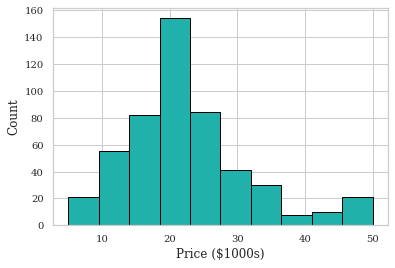

In [8]:
# Histogram of prices:
plt.hist(dfBoston.PRICE, histtype='bar', color = 'lightseagreen', edgecolor='black') 
plt.xlabel('Price ($1000s)')
plt.ylabel('Count')

In [9]:
dfBoston['CRIME_LEVEL'] = np.where(dfBoston['CRIM'] > 4, 'High', 'Low')
dfBoston.tail(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,CRIME_LEVEL
486,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98,19.1,High
487,4.83567,0.0,18.10,0.0,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45,20.6,High
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06,15.2,Low
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0,Low
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1,Low
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6,Low
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35,20.1,Low
493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,396.90,12.01,21.8,Low
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59,24.5,Low
495,0.17899,0.0,9.69,0.0,0.585,5.670,28.8,2.7986,6.0,391.0,19.2,393.29,17.60,23.1,Low


In [10]:
# coorelation between variables, error increases if two data os having high correlation so > 0.7
dfCorr = dfBoston[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'LSTAT', 'PRICE']]
corrMat = dfCorr.corr()
print(corrMat)

           CRIM     INDUS       NOX        RM       AGE     LSTAT     PRICE
CRIM   1.000000  0.406583  0.420972 -0.219247  0.352734  0.455621 -0.388305
INDUS  0.406583  1.000000  0.763651 -0.391676  0.644779  0.603800 -0.483725
NOX    0.420972  0.763651  1.000000 -0.302188  0.731470  0.590879 -0.427321
RM    -0.219247 -0.391676 -0.302188  1.000000 -0.240265 -0.613808  0.695360
AGE    0.352734  0.644779  0.731470 -0.240265  1.000000  0.602339 -0.376955
LSTAT  0.455621  0.603800  0.590879 -0.613808  0.602339  1.000000 -0.737663
PRICE -0.388305 -0.483725 -0.427321  0.695360 -0.376955 -0.737663  1.000000


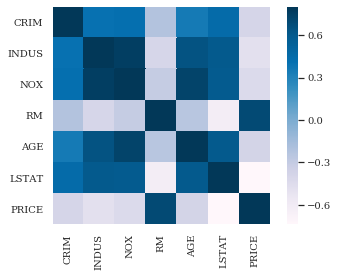

In [11]:
# Draw the heatmap using seaborn
sns.heatmap(corrMat, vmax = .8, square = True, cmap="PuBu") # cmap refers to the matplotlib colormaps
plt.savefig("corrPlot.png", dpi = 300, bbox_inches = 'tight')

On colors:
* You can try various colors "OrRd", "PuBu", "YlOrBr" or hexcodes ("#67E568") to pass to the color map or use color palettes. There is a lot of flexibility. Check [Seaborn color palette documentation](http://seaborn.pydata.org/tutorial/color_palettes.html) for fiddling with colors.

### Visualizations

We first consider the task of predicting median house values in the Boston area using as the predictor one of the attributes, for instance, `LSTAT`, defined as the "proportion of lower status of the population".

Seaborn visualization can be used to show this linear relationships easily. We are using seaborns's [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html). <br>
This [tutorial](https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial) discusses about visualizing linear relationships using `seaborn` in detail. 

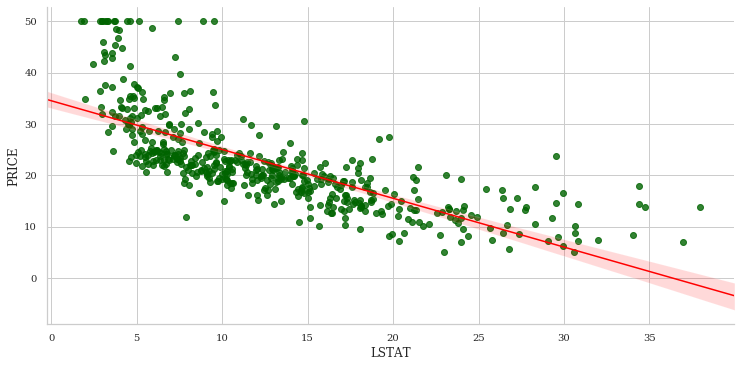

In [12]:
# relationship between the propotion of lower status population and price
sns.lmplot("LSTAT", "PRICE", dfBoston, height = 5.2, aspect = 2, line_kws = {'color' : 'red',  'lw':1.5}, scatter_kws = {'color':'darkgreen'});
plt.savefig("lmplotBostonLSTAT.png", dpi = 300, bbox_inches = 'tight')

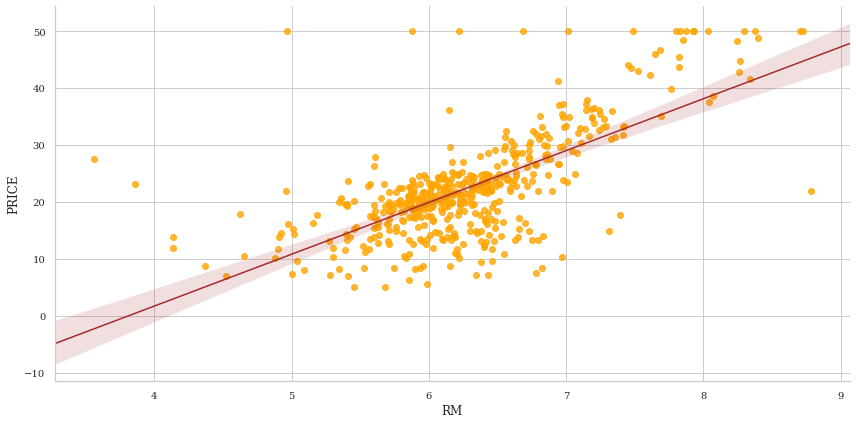

In [13]:
# relationship between the average number of rooms and price
sns.lmplot("RM", "PRICE", dfBoston, height = 6, aspect = 2, line_kws = {'color' : 'brown', 'lw':1.5}, scatter_kws = {'color':'orange'});

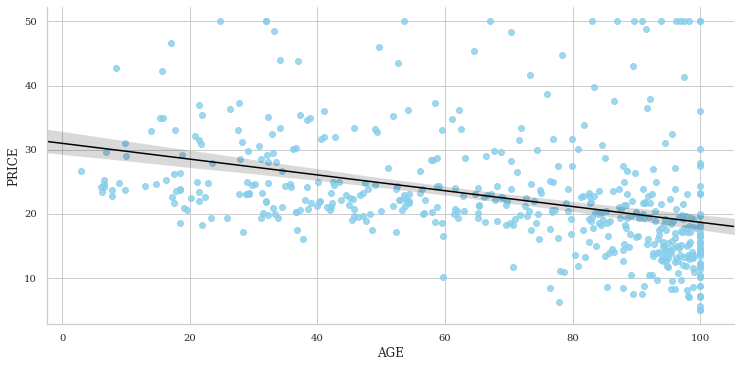

In [14]:
# relationship between the age and price
sns.lmplot("AGE", "PRICE", dfBoston, height = 5.2, aspect = 2, line_kws = {'color' : 'black', 'lw' : 1.5}, scatter_kws = {'color':'skyblue'});

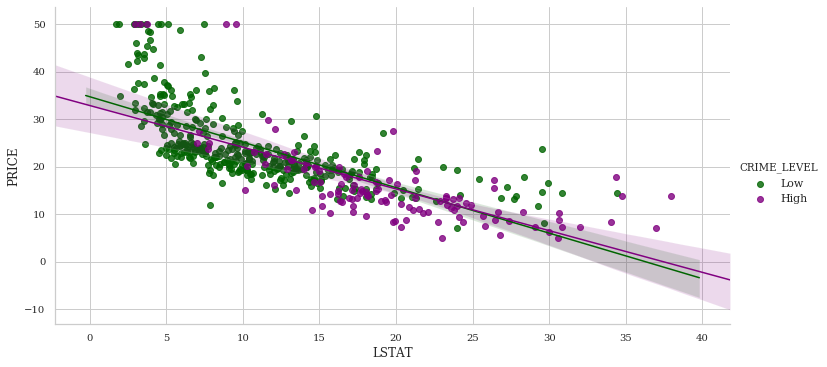

In [15]:
# use "hue" to condition on a third variable and plot the levels in different colors.
# Let's introduce "CRIME_LEVEL" variable to the LSTAT vs. PRICE plot
sns.lmplot("LSTAT", "PRICE", dfBoston, hue = "CRIME_LEVEL", height = 5.2, aspect = 2, line_kws = {'lw':1.5}, palette=dict(High="purple", Low = "darkgreen"));

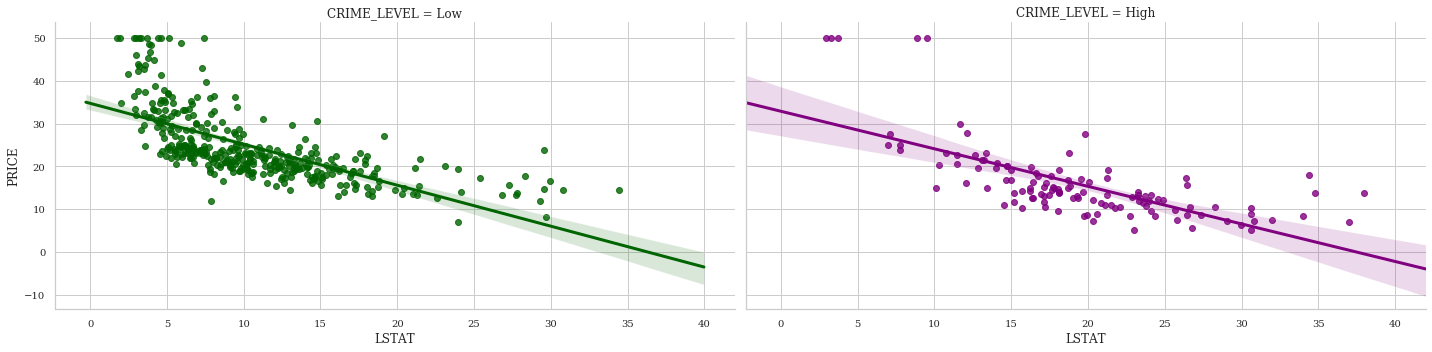

In [16]:
# Use "col" to Plot the levels of the third variable across different columns.
sns.lmplot("LSTAT", "PRICE", dfBoston, hue = "CRIME_LEVEL", col = "CRIME_LEVEL", height = 5, aspect = 2, palette=dict(High="purple", Low = "darkgreen"));

We can use seaborn's [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=plot) to draw scatter plots to show pair-wise relationships and histograms for univariate distributions.

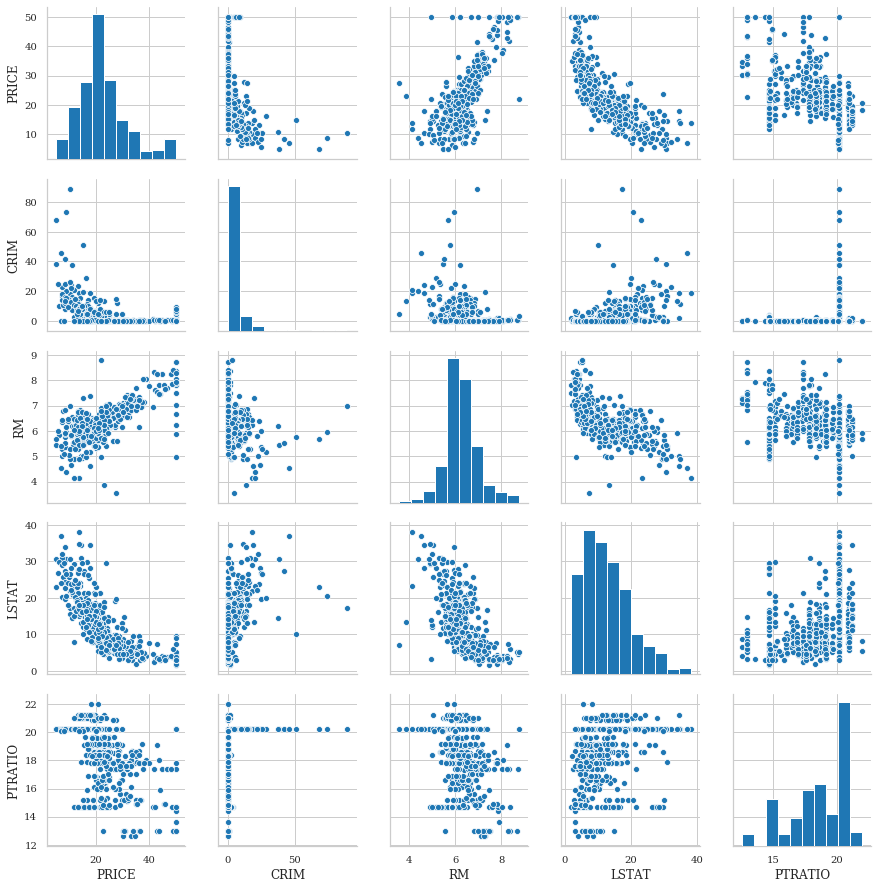

In [17]:
sns.pairplot(dfBoston[['PRICE','CRIM','RM','LSTAT','PTRATIO','CRIME_LEVEL']]);

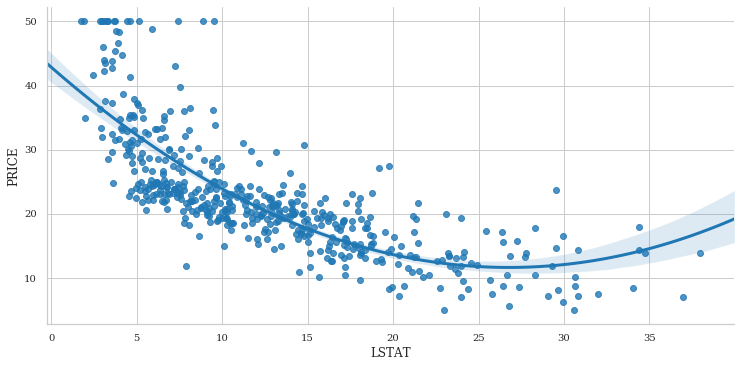

In [18]:
# when order is greater than one, a polynomial regression is estimated
sns.lmplot("LSTAT", "PRICE", dfBoston, order = 2, height = 5.2, aspect = 2)
plt.savefig("lmplotBostonLSTAT_order2.png", dpi = 300, bbox_inches = 'tight')

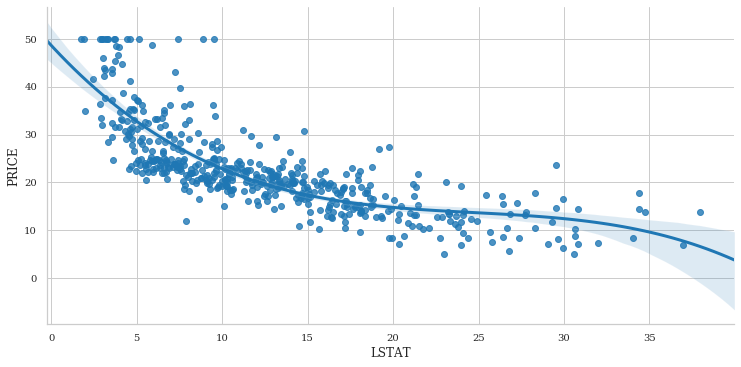

In [19]:
sns.lmplot("LSTAT", "PRICE", dfBoston, order = 3, height = 5.2, aspect = 2);
plt.savefig("lmplotBostonLSTATorder3.png", dpi = 300, bbox_inches = 'tight')

### Linear Regression with Statsmodels Package

The ``statsmodels`` package provides several different classes that provide different options for linear regression. Getting started with linear regression is quite straightforward with the `OLS` module.

We can perform the regression of the predictor on the response, using the ``sm.OLS`` class and its initialization ``OLS(y, X)`` method. This method takes as an input two array-like objects: $X$ and $\textbf{y}$. In general, $X$ will either be a numpy array or a pandas data frame with shape ``(n, p)`` where $n$ is the number of data points and $p$ is the number of predictors. $\textbf{y}$ is either a one-dimensional numpy array or a pandas series of length $n$.

In [20]:
import statsmodels.api as sm

X = dfBoston.drop(columns=['PRICE', 'CRIME_LEVEL'])

X2 = sm.add_constant(X) # Adds a column of ones
Y = dfBoston["PRICE"]

model = sm.OLS(Y, X2) # Creates an OLS estimator
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 11 Nov 2019   Prob (F-statistic):          6.72e-135
Time:                        14:40:59   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

Interpretation:<br>The coefficient for each of the variables indicates the amount of change one would expect in median house price in response to a one unit increase in the value of that variable, given that all other variables in the model are held constant.

In [21]:
# An alternative method
import statsmodels.formula.api as smf

reg='PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + np.power(LSTAT,2)'
model = smf.ols(formula = reg, data = dfBoston) 
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     131.5
Date:                Mon, 11 Nov 2019   Prob (F-statistic):          6.18e-156
Time:                        14:54:37   Log-Likelihood:                -1446.1
No. Observations:                 506   AIC:                             2922.
Df Residuals:                     491   BIC:                             2986.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             43.5815      4

### <mark>Exercise</mark>

Analyze `auto.csv`, a data file based on the [Auto Dataset from the UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

 - Clean and preprocess your data as appropriate.
 - Using visual plots, explore the relationship between "mpg" as the response variable and the other predictors in the dataset.
 - Use regression analysis to model the relationships between "mpg" as the response variable and the other predictors in the dataset.
 - Try both simple linear and polynomial models (by transforming the predictor variables). 
 - Which predictors appear to have a statistically significant relationship to the response variable?
 - Is there evidence for non-linear association between some predictors and the response?

In [51]:
dfAuto = pd.read_csv('auto.csv', na_values = '?')
dfAuto.replace('?', np.NaN)
dfAuto.dropna(inplace = True)

In [52]:

reg='mpg~cylinders + displacement + horsepower+  year+ origin + weight+ name + np.power(weight,2)'
model = smf.ols(formula = reg, data = dfAuto) 
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     14.68
Date:                Mon, 11 Nov 2019   Prob (F-statistic):           2.55e-32
Time:                        15:28:42   Log-Likelihood:                -579.92
No. Observations:                 392   AIC:                             1774.
Df Residuals:                      85   BIC:                             2993.
Df Model:                         306                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

### Logistic Regression

Logistic model (or logit model) is usually applied when there is a binary dependent variable. In the logistic model, the log-odds of the probability of an event is modeled as a linear combination of independent or predictor variables. 

In [ ]:
#used for true/False

In [53]:
dfAdmissions = pd.read_csv('admissions.csv')
dfAdmissions.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [54]:
dfAdmissions.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [55]:
dfAdmissions['rank'].unique()

array([3, 1, 4, 2], dtype=int64)

In [56]:
pd.crosstab(dfAdmissions['admit'], dfAdmissions['rank'])

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


In [57]:
# Create dummy variables for rank
dummyRanks = pd.get_dummies(dfAdmissions['rank'], prefix = 'rank')
dummyRanks.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [58]:
dfWithDummies = dfAdmissions[['admit', 'gre', 'gpa',]].join(dummyRanks[dummyRanks.columns[1:]])
#do not include first dummy column so 3 out of for so 1 is there or redundant would be the problem
dfWithDummies.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [59]:
X = dfWithDummies[dfWithDummies.columns[1:]]
X = sm.add_constant(X)
Y = dfWithDummies['admit']

model = sm.Logit(Y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Mon, 11 Nov 2019   Pseudo R-squ.:                 0.08292
Time:                        15:32:24   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9900      1.140     -3.500      0.000      -6.224      -1.756
gre            0.0023      0.

**Interpretation**:
- For every one unit increase in `gre`, the log odds of admission (vs. non-admission) increases by `0.0023`
- For a one unit increase in `gpa`, the log odds of admission increases by `0.804`
- Having attended an undergraduate institution with `rank=2` vs. and institution with `rank=1`, decreases the log odds of admission by `0.675`

For easier interpretation, we can convert the coefficients into `odd-ratios`.

In [60]:
# Obtaining Odd Ratios #exponentiating 
print(np.exp(result.params))

const     0.018500
gre       1.002267
gpa       2.234545
rank_2    0.508931
rank_3    0.261792
rank_4    0.211938
dtype: float64


Example interpreations using odd-ratios:
 - for a one unit increase in `gre`, the odds of admission to grad school increases by a factor of `1.002267` (`0.2267%`)
 - the odds of admission for an applicant who attended a `rank-2` institution is `0.508931` times lower than the odds of admission for an applicant who attended a `rank-1` institution. 